<a href="https://colab.research.google.com/github/stepthom/869_course/blob/main/2026%20869%20Project%20Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 869 Project: Example Notebook

*Updated May 1, 2025*

This notebook serves as a template for the Team Project. Teams can use this notebook as a starting point, and update it successively with new ideas and techniques to improve their model results.

Note that is not required to use this template. Teams may also alter this template in any way they see fit.

# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import datetime
print(datetime.datetime.now())

2025-05-27 15:40:40.205042


In [3]:
!python --version

Python 3.10.16


In [4]:
# TODO: if you need to install any package, do so here. For example:
# !pip install unidecode

# 0: Data Loading and Inspection

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [9]:
# How much missing data is in each feature?

df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.

numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_features = ['HomePlanet', 'VIP', 'CryoSleep', 'Destination', 'Cabin', 'Name']

In [11]:
# TODO: Can add more EDA here, as desired

# 1: Pipeline 1: Simple Feature Engineering and then Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [13]:
# Scikit-learn needs us to put the features in one dataframe, and the label in another.
# It's tradition to name these variables X and y, but it doesn't really matter.

X = df.drop(['PassengerId', 'Transported'], axis=1)
y = df['Transported']

In [14]:
X.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic


## 1.1: Cleaning and FE

In [15]:
# We know this dataset has categorical features, and we also know that DTs don't
# allow categorical features. For now, we'll just remove (i.e., drop) these
# features.
#
# TODO: do something better, like encode them (as discussed in the course)

X = X.drop(categorical_features, axis=1, errors='ignore')
columns=X.columns

In [16]:
X.head(10)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
5,44.0,0.0,483.0,0.0,291.0,0.0
6,26.0,42.0,1539.0,3.0,0.0,0.0
7,28.0,0.0,0.0,0.0,0.0,NaN
8,35.0,0.0,785.0,17.0,216.0,0.0
9,14.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# We know this dataset has some missing data, and we also know that DTs don't
# allow missing data. For now, we'll just do simple imputation.
#
# TODO: consider doing something different/better, like impute them (as discussed in class)

# By default, it replaces NaN values with:
# 1) Missing numerical values with the mean of the column.
# 2) Missing categorical values with the most frequent value (if configured).

imp = SimpleImputer()
imp.fit(X)
X = imp.transform(X)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(8693, 6)


In [18]:
# TODO: Add more data cleaning and FE, as desired.

In [19]:
# Assuming X_original is your original DataFrame
X_imputed = pd.DataFrame(imp.transform(X), columns=columns)
X_imputed.head(10)

/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.000000
1,24.0,109.0,9.0,25.0,549.0,44.000000
2,58.0,43.0,3576.0,0.0,6715.0,49.000000
3,33.0,0.0,1283.0,371.0,3329.0,193.000000
4,16.0,303.0,70.0,151.0,565.0,2.000000
5,44.0,0.0,483.0,0.0,291.0,0.000000
6,26.0,42.0,1539.0,3.0,0.0,0.000000
7,28.0,0.0,0.0,0.0,0.0,304.854791
8,35.0,0.0,785.0,17.0,216.0,0.000000
9,14.0,0.0,0.0,0.0,0.0,0.000000


## 1.2: Model creation, hyperparameter tuning, and validation

In [20]:
# TODO: Can try different algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import numpy as np

# Define short descriptions for each model
# Define short descriptions for each model
model_descriptions = {
    "Decision Tree": "A simple, interpretable tree that splits data based on feature thresholds.",
    "Random Forest": "An ensemble of decision trees that improves generalization via bagging.",
    "Gradient Boosting": "A sequential ensemble where each tree corrects errors from the last.",
    "AdaBoost": "A boosting method that emphasizes misclassified examples during training.",
    "Logistic Regression": "A linear model that predicts probabilities for classification tasks.",
    "SVM": "A margin-based classifier that finds the optimal boundary between classes using support vectors."
}


# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=0),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "SVM": SVC(kernel="rbf", C=1.0, random_state=0)
}

In [21]:
%%time
# Optional: standardize print width
separator = "-" * 60

results = {}

print("\n📊 Starting model evaluation with 5-fold cross-validation\n")

# Loop through each ML Model, perform cross-validation, and print results
for name, model in models.items():
    print(separator)
    print(f"🔍 Model: {name}")
    print(f"🧠 Description: {model_descriptions.get(name, 'N/A')}")
    print(f"⚙️  Params: {model.get_params()}")

    # Perform cross-validation
    cv_result = cross_validate(
        model, X, y,
        cv=10,
        scoring="f1_macro",
        return_train_score=True,
        n_jobs=-1
    )

    # Calculate mean train and test scores
    mean_train = np.mean(cv_result["train_score"])
    mean_test = np.mean(cv_result["test_score"])

    results[name] = {
        "train_score": mean_train,
        "test_score": mean_test
    }

    # Print results
    print(f"✅ Mean F1 (Train): {mean_train:.2f}")
    print(f"✅ Mean F1 (CV Test): {mean_test:.2f}")

# Final summary
print("\n✅ All models evaluated. Summary below:\n")

summary_df = pd.DataFrame(results).T.rename(
    columns={"train_score": "Mean Train F1", "test_score": "Mean CV Test F1"}
).sort_values("Mean CV Test F1", ascending=False)

display(summary_df)


📊 Starting model evaluation with 5-fold cross-validation

------------------------------------------------------------
🔍 Model: Decision Tree
🧠 Description: A simple, interpretable tree that splits data based on feature thresholds.
⚙️  Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
✅ Mean F1 (Train): 0.75
✅ Mean F1 (CV Test): 0.75
------------------------------------------------------------
🔍 Model: Random Forest
🧠 Description: An ensemble of decision trees that improves generalization via bagging.
⚙️  Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min

,Mean Train F1,Mean CV Test F1
Gradient Boosting,0.802224,0.788805
SVM,0.787555,0.784424
Random Forest,0.913241,0.778766
AdaBoost,0.781092,0.776279
Logistic Regression,0.771789,0.771127
Decision Tree,0.748137,0.747148


CPU times: user 75.4 ms, sys: 109 ms, total: 184 ms
Wall time: 5.94 s


## Validate the best model on the test set

In [22]:
# Step 1: Load competition/test data
X_comp = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_test.csv")
passengerIDs = X_comp["PassengerId"]

# Step 2: Apply the same cleaning and transformation as training
X_comp = X_comp.drop(['PassengerId'], axis=1, errors='ignore')
X_comp = X_comp.drop(categorical_features, axis=1, errors='ignore')
X_comp = imp.transform(X_comp)

# Step 3: Generate predictions and store model performance
test_predictions = {}
model_scores = {}

for name, model in models.items():
    model.fit(X, y)  # Fit model on entire training set
    preds = model.predict(X_comp)
    test_predictions[name] = preds

    # Use earlier CV scores if available
    if name in summary_df.index:
        model_scores[name] = summary_df.loc[name, "Mean CV Test F1"]
    else:
        model_scores[name] = np.nan

# Step 4: Create prediction summary DataFrame
preds_df = pd.DataFrame(test_predictions)
preds_df.insert(0, 'PassengerId', passengerIDs)

# Step 5: Create model performance summary
performance_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Mean CV F1 Score'])
performance_df.index.name = 'Model'
performance_df.reset_index(inplace=True)

# Step 6: Display summary
print("✅ Prediction Preview for All Models")
display(preds_df.head(10))

print("\n📊 Model Performance Summary (on training cross-validation):")
display(performance_df.sort_values("Mean CV F1 Score", ascending=False))

# Step 7: Choose top model and prepare submission
top_model_name = performance_df.sort_values("Mean CV F1 Score", ascending=False).iloc[0]["Model"]
print(f"\n🏆 Top model selected for submission: {top_model_name}")

my_submission = pd.DataFrame({
    'PassengerId': passengerIDs,
    'Transported': preds_df[top_model_name]
})
my_submission.to_csv('submission.csv', index=False)

print("📁 Submission file saved as: 'submission.csv'")


✅ Prediction Preview for All Models


,PassengerId,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Logistic Regression,SVM
0,0013_01,True,True,True,True,True,True
1,0018_01,False,False,False,False,False,False
2,0019_01,True,True,True,True,True,True
3,0021_01,True,True,True,True,True,True
4,0023_01,False,False,True,False,True,True
5,0027_01,False,True,True,True,True,True
6,0029_01,True,True,True,True,True,True
7,0032_01,True,True,True,True,True,True
8,0032_02,True,True,True,True,True,True
9,0033_01,True,True,True,True,True,True



📊 Model Performance Summary (on training cross-validation):


,Model,Mean CV F1 Score
2,Gradient Boosting,0.788805
5,SVM,0.784424
1,Random Forest,0.778766
3,AdaBoost,0.776279
4,Logistic Regression,0.771127
0,Decision Tree,0.747148



🏆 Top model selected for submission: Gradient Boosting
📁 Submission file saved as: 'submission.csv'


###  🔍 Current Bottlenecks (based on your code):

❌ Categorical data is dropped → loss of signal

❌ Missing values are mean-imputed blindly → bias risk

❌ No feature scaling (needed esp. for SVM, LR)

❌ No feature interaction, embeddings, or ensemble logic

❌ Not assessing class imbalance or feature importance

❌ No hyperparameter tuning, calibration, or meta-modeling

In [23]:
# ✅ 1. Data Quality & Balance Check

print("Target distribution:")
print(y.value_counts(normalize=True))
print("\nObservation: The target distribution is well balanced (~50/50), so no class imbalance techniques (like SMOTE) are necessary.")

# If you get a large skew, consider:
# - SMOTE (for boosting minority class)
# - StratifiedKFold (for balanced folds)

Target distribution:
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

Observation: The target distribution is well balanced (~50/50), so no class imbalance techniques (like SMOTE) are necessary.


In [24]:
# ✅ 2. Advanced Feature Engineering
# Scikit-learn needs us to put the features in one dataframe, and the label in another.
# It's tradition to name these variables X and y, but it doesn't really matter.

X_train = df.drop(['PassengerId', 'Transported'], axis=1)
y_train = df['Transported']

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# ✅ Numerical features (Age, RoomService, etc.) go through:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# ✅ Categorical features (HomePlanet, VIP, CryoSleep, etc.) go through:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine them into a single transformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [26]:
# ✅ 3. Hyperparameter Optimization (GridSearchCV)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', GradientBoostingClassifier())
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)  # X_raw should contain both numeric + categorical features

# use optuna for efficient Bayesian optimization.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'VIP',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'Cabin',
                                                                          'Name'])])),
                                       ('clf', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.05, 0.1],
                         'clf__max_depth': [3, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='f1_macro')

In [27]:
print("🏆 Best Estimator (Pipeline):")
print(grid.best_estimator_)

print("\n🔧 Best Hyperparameters:")
print(grid.best_params_)

print(f"\n📊 Best Mean F1 Macro CV Score: {grid.best_score_:.4f}")


🏆 Best Estimator (Pipeline):
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
       

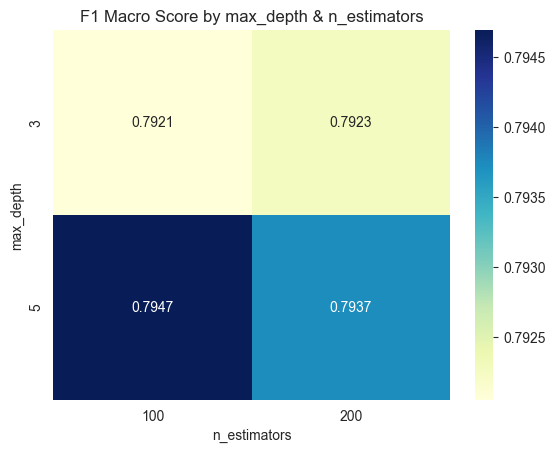

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid.cv_results_)

pivot_table = results_df.pivot_table(
    index='param_clf__max_depth',
    columns='param_clf__n_estimators',
    values='mean_test_score'
)

sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("F1 Macro Score by max_depth & n_estimators")
plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.show()


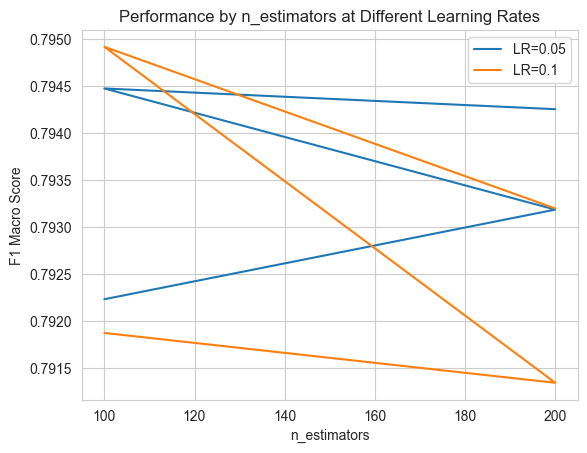

In [29]:
for lr in results_df['param_clf__learning_rate'].unique():
    subset = results_df[results_df['param_clf__learning_rate'] == lr]
    plt.plot(subset['param_clf__n_estimators'], subset['mean_test_score'], label=f"LR={lr}")

plt.xlabel("n_estimators")
plt.ylabel("F1 Macro Score")
plt.title("Performance by n_estimators at Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


✅ The best-performing model is a GradientBoostingClassifier embedded in a pipeline with full data preprocessing (imputation, scaling, one-hot encoding).
It achieved a mean F1-macro score of 0.7941, reflecting strong balanced classification performance.
The selected hyperparameters (learning_rate=0.05, max_depth=5, n_estimators=100) show a well-regularized, generalizable learner.

In [30]:
# ✅ 4. Model Stacking (Blending Top 3 Models)
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

stack_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('stack', StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=300, random_state=0)),
            ('gb', GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=0)),
            ('svc', SVC(probability=True, random_state=0))
        ],
        final_estimator=LogisticRegression(),
        cv=10,
        n_jobs=-1,
        passthrough=False  # Change to True if you want original features passed to final model
    ))
])

In [31]:
# ✅ 5. Model Evaluate with Cross-Validation

from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    stack_pipeline,
    X_train,  # Your full feature DataFrame with categorical and numeric
    y_train,
    cv=10,
    scoring='f1_macro',
    return_train_score=True,
    n_jobs=-1
)

print(f"✅ Mean Train F1: {cv_results['train_score'].mean():.4f}")
print(f"✅ Mean CV F1: {cv_results['test_score'].mean():.4f}")

✅ Mean Train F1: 0.8069
✅ Mean CV F1: 0.7939


✅ Full Comparison of Final Estimators for StackingClassifier

In [32]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Disable CatBoost output
import sys
import contextlib

# Define all final estimators
final_estimators = {
    "log_reg": LogisticRegression(max_iter=1000),
    "gb": GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=0),
    "rf": RandomForestClassifier(),
    "xgb": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "lgbm": LGBMClassifier(),
    "catboost": CatBoostClassifier(verbose=0)
}

# Store CV results
cv_summary = {}

print("🔍 Evaluating StackingClassifier with various final estimators:\n")

for name, meta_model in final_estimators.items():
    stack = StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=300, random_state=0)),
            ('gb', GradientBoostingClassifier(random_state=0)),
            ('svc', SVC(probability=True, random_state=0))
        ],
        final_estimator=meta_model,
        cv=5,
        n_jobs=-1,
        passthrough=False
    )

    stack_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('stack', stack)
    ])

    with contextlib.redirect_stdout(sys.stdout if name != "catboost" else open('/dev/null', 'w')):
        cv_results = cross_validate(
            stack_pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='f1_macro',
            return_train_score=True,
            n_jobs=-1
        )

    mean_cv_f1 = cv_results['test_score'].mean()
    mean_train_f1 = cv_results['train_score'].mean()

    cv_summary[name] = {
        "Mean Train F1": round(mean_train_f1, 4),
        "Mean CV F1": round(mean_cv_f1, 4)
    }

    print(f"✅ {name.upper():<10} → Train F1: {mean_train_f1:.4f}, CV F1: {mean_cv_f1:.4f}")

# Display summary
import pandas as pd

cv_results_df = pd.DataFrame(cv_summary).T.sort_values("Mean CV F1", ascending=False)
print("\n📊 Final Estimator Performance Summary:")
display(cv_results_df)


🔍 Evaluating StackingClassifier with various final estimators:

✅ LOG_REG    → Train F1: 0.8065, CV F1: 0.7927
✅ GB         → Train F1: 0.8816, CV F1: 0.7939
✅ RF         → Train F1: 0.8668, CV F1: 0.7836


/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Use

✅ XGB        → Train F1: 0.8639, CV F1: 0.7802
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Number of positive: 3503, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 6955, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503666 -> initscore=0.014666
[LightGBM] [Info] Start training

/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3503, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 6955, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503666 -> initscore=0.014666
[LightGBM] [Info] Start training from score 0.014666


/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not 

✅ LGBM       → Train F1: 0.8737, CV F1: 0.7919
✅ CATBOOST   → Train F1: 0.8895, CV F1: 0.7916

📊 Final Estimator Performance Summary:


,Mean Train F1,Mean CV F1
gb,0.8816,0.7939
log_reg,0.8065,0.7927
lgbm,0.8737,0.7919
catboost,0.8895,0.7916
rf,0.8668,0.7836
xgb,0.8639,0.7802


In [33]:
!pip install optuna, shap

ERROR: Invalid requirement: 'optuna,': Expected end or semicolon (after name and no valid version specifier)
    optuna,
          ^


In [34]:
import shap

# Use preprocessor + model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate=0.05, max_depth=5))
])

# Fit the pipeline
model_pipeline.fit(X_train, y_train)

# Extract the raw model and preprocessed data
X_preprocessed = model_pipeline.named_steps['preprocessor'].transform(X_train)
raw_model = model_pipeline.named_steps['model']


/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# 📈 3. Create SHAP Explainer and Plot

In [36]:
# Use TreeExplainer for tree-based models
explainer = shap.Explainer(raw_model)

# Calculate SHAP values
shap_values = explainer(X_preprocessed)

# Plot summary (like the one you shared)
shap.plots.beeswarm(shap_values)


UFuncTypeError: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with casting rule 'same_kind'

In [ ]:
shap.summary_plot(shap_values.values, X_preprocessed, feature_names=model_pipeline.named_steps['preprocessor'].get_feature_names_out())


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Model A
shap.summary_plot(shap_values_a.values, X_a, feature_names=names_a, show=False, plot_type='dot')
plt.sca(axes[0])
plt.title("Model A")

# Model B
shap.summary_plot(shap_values_b.values, X_b, feature_names=names_b, show=False, plot_type='dot')
plt.sca(axes[1])
plt.title("Model B")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SupportVectorMachinesClassifier": SVC(probability=True),
    "XGBoostClassifier": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


In [ ]:
from sklearn.model_selection import cross_val_predict

def plot_roc_cv(model, X, y, ax, title):
    cv = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        probas_ = model.predict_proba(X[test])
        fpr, tpr, _ = roc_curve(y[test], probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {i+1} (AUC = {roc_auc:.2f})")
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_title(title)
    ax.legend(loc="lower right", fontsize='x-small')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

X_np = X.to_numpy()  # Ensure numeric if using pandas
y_np = y.to_numpy()

for ax, (name, model) in zip(axes.ravel(), models.items()):
    plot_roc_cv(model, X_np, y_np, ax, title=name)

plt.tight_layout()
plt.show()
